# Deepcamp: Codelab 1

**In this tutorial we will cover**:

- Basic ML libraries
- Data analysis & preprocessing
- Basic Machine Learning models


**Author**:
- Alessio Devoto (alessio.devoto@uniroma1.it)

**Duration**: 50 mins 


# Customer Churning in telecom company

- You are employed in a telecom company and have a dataset containing info (id, age, tenure etc..) about your clients.
- You are asked to build a Machine Learning model that predicts whether a client will churn (leave this compamy for another).

What are we going to do? 🤔

1. Data import 💾
2. Data analysis 🔍
3. Data preprocessing ⚙️
4. Training & evaluation of a bunch of ML models 📉

Throughtout this notebook, we should always bear in mind what are the most important steps to perform during an ML project.

<img src='https://raw.githubusercontent.com/alessiodevoto/deepers/main/images/ml_pipeline.png' width="800">


For starters, let's install the necessary libraries:

- pandas: for data manipulation
- scikit-learn: for basic ML algorithms 
- seaborn and plotly: for plotting

In [ ]:
!pip install pandas
!pip install scikit-learn
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Some imports for later

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

We download the data and store it locally in a simple csv file.

⛔ This will hardly ever be the case. You usually have to collect your date and do a lot of preprocessing to get to this stage.

In [ ]:
# with a ! you can run (mostly) any bash command directly from here

!wget https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv

--2023-04-20 21:00:46--  https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 970457 (948K) [text/plain]
Saving to: ‘Telco-Customer-Churn.csv’

Telco-Customer-Chur 100%[===================>] 947.71K  --.-KB/s    in 0.04s   

2023-04-20 21:00:46 (26.0 MB/s) - ‘Telco-Customer-Churn.csv’ saved [970457/970457]



## 1. Import the dataset and play around a bit. 

Before starting to compute statistics of our dataset, we should always **look at the data**.


This is important as simple statistics can be misleading (take a look at the Datasaurus dozen down here, where all these datasets have the *same* stats)

![datasaurus](https://raw.githubusercontent.com/alessiodevoto/deepers/main/images/datasaurus.png?token=GHSAT0AAAAAABWF4CTHGWYFKUHRTGM3XWQWZBJIXSA)


Unfortunately, looking at the data is not always easy, especially for high dimensional datasets. 
Let us check what our data look like though ...


### 1.1 ⬇️ Import the dataset

The big star of `Pandas` objects is the `Dataframe`, that is, a big table containing data samples. 

Usually each row is a data sample (in our case a client) and each column is a feature (e.g. 'age', 'tenure' and so on...).


We can load our csv into a `Dataframe` like this (`Pandas` accepts other input formats as well, like json, txt, etc... ):

In [ ]:
# load data into a table
cust_data = pd.read_csv('./Telco-Customer-Churn.csv')

Let's take a look 👀

In [ ]:
# just have a look at the first rows
cust_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# number of rows and cols
# this is a small dataset, but pandas can handle HUGE amounts of data
cust_data.shape 

(7043, 21)

In [ ]:
# column names
cust_data.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [ ]:
# summary info
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# numerical cols info
cust_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


We can index a `Dataframe` in different ways

- `loc` selects rows and columns with specific labels ➡ select by label
- `iloc` selects rows and columns at specific integer positions ➡ select by index
- brackets `[]` to select columns 

In [ ]:
# slice a single col like this
cust_data['Contract'] 

# or like this (label based slicing)
# cust_data.loc[: ,'Contract']

# or like this
# cust_data.Contract

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, Length: 7043, dtype: object

These will all return a `Series`, use double brackets to get another `DataFrame`.

In [ ]:
# first row first three cols (integer based slcing)
cust_data.iloc[0, 1:3]

gender           Female
SeniorCitizen         0
Name: 0, dtype: object

We can also select rows based on the content of a column

In [ ]:
# boolean indexing
cust_data[cust_data['gender'] == 'Male']

# or 
# cust_data.loc[cust_data['gender'] == 'Male']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
#@title Exercise 🏋: Select all the Male clients who have a Partner
# Hint: combine conditions with bitwise and (&) in Python 

# your code here


In [ ]:
#@title Peek Solution 👀

cust_data.loc[(cust_data['gender']=='Male') & (cust_data['Partner']=='No')]

Some more fancy stuff with columns ...

In [ ]:
# average tenure

cust_data['tenure'].mean() # or sum or max or min or argmax or unique or value_counts

32.37114865824223

In [ ]:
# group elements by value in specific col
cust_data.groupby('Churn')['tenure'].mean()

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

You can do a lot more cool stuff with pandas, have a look at the [pandas documentation](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)

### 1.2 🔍 Going deeper: data types & missing values

We could only look at some of the data (what a human can do), yet we need better tools to analyze it more in depth.

There are a lot of questions we could ask, two of them being: 
- are all datatypes ***coherent*** with their content? (We don't want an int to be regarded as an object)
- does ***every cell*** in our dataset contain a *valid value*?

In [ ]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Something weird: `total charges` should be a numeric data type, not object. We should cast that column to a numeric one!

In [ ]:
# Converting Total Charges to a numerical data type.
# If not castable, will give a NaN.
cust_data.TotalCharges = pd.to_numeric(cust_data.TotalCharges, errors='coerce')
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Now everything seems more resonable. 

Do all cells contain **valid values** though ?

In [ ]:
# check for NaN values
cust_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Some lines contain bad `NaN` values, and we don't want to keep them, as they would hinder the training of our model.

In [ ]:
#@ title Exercise 🏋: can we have a look at the bad lines ?
# hint: those lines will have a numpy.nan value in the TotalCharges column
import numpy as np
cust_data.loc[np.isnan(cust_data['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


What shall we do with these rows?

In general, we have a lot of options for [data imputation](https://www.simplilearn.com/data-imputation-article): we can replace missing values with the **mean**, the **median** (advised if there are outliers) or use even more advanced methods like **KNN** for data imputation.

In [ ]:
nonull_cust_data = cust_data.loc[~np.isnan(cust_data['TotalCharges'])]
# or  nonull_cust_data = cust_data.dropna()

nonull_cust_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#@title Exercise 🏋
#Instead of removing NaNs, replace them with the mean



In [ ]:
#@title Peek solution 👀

cust_data.loc[np.isnan(cust_data['TotalCharges']), 'TotalCharges'] = cust_data['TotalCharges'].mean()

# or cust_data.fillna(cust_data["TotalCharges"].mean())

## 2. Exploratory data analysis (EDA)

Should we just go on and build our ML model now? 

![eda](https://raw.githubusercontent.com/alessiodevoto/deepers/main/images/eda.jpg?token=GHSAT0AAAAAABWF4CTG47DRLQNHSEA7K75OZBIT4MA)

After looking at the data, we fixed some of the missing values and inconsistencies we found. 

Now it's time to explore it more in depth and check for correlation between variables.

We are going to use some plotting libraries to get a better idea of the data distribution, let's start with a simple histogram.

In [ ]:
color_map = {"Yes": '#fd7f6f', "No": '#7eb0d5'}
fig = px.histogram(cust_data, x="Churn", color="Partner", barmode="group", title="<b>Churn distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Any observations?

In [ ]:
color_map = {"Yes": "#b2e061", "No": "#bd7ebe"}
fig = px.histogram(cust_data, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Any observations?

In [ ]:
#@title Exercise 🏋: Plot churning wrt Paperless billing
# any observations?



In [ ]:
#@title Peek Solution 👀

color_map = {"Yes": '#ffb55a', "No": '#beb9db'}
fig = px.histogram(cust_data, x="Churn", color="PaperlessBilling", barmode='group',  title="<b>Churn distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

We can also plot something cooler: let's make a pie chart! 🥧


In [ ]:
# First, we get the unique values for the payment method
payments_methods = cust_data['PaymentMethod'].value_counts()
print(payments_methods)

labels = payments_methods.index
values = payments_methods.values


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


In [ ]:
# then we make a pie chart with these values

fig = px.pie(cust_data, values=values, names=labels , hole=.3)
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

Is there a correlation between payment method and churning ? Let's find out

In [ ]:
# plot payment method wrt churn 
fig = px.histogram(cust_data, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

<ipython-input-37-fea2d5d26b21>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-37-fea2d5d26b21>:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Text(0.5, 1.0, 'Distribution of monthly charges by churn')

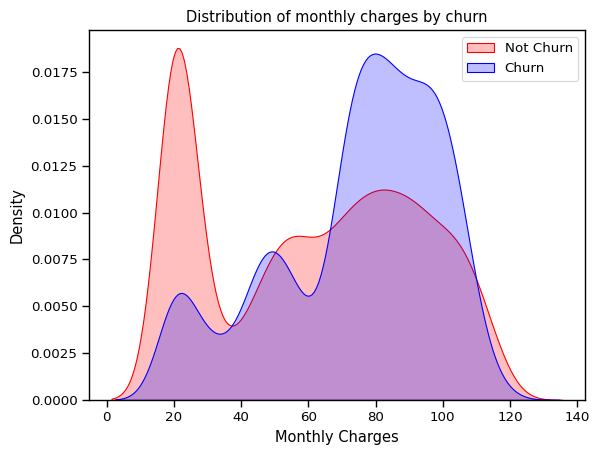

In [ ]:
#@title Optional plot: distribution of monthly charges wrt to churn


sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(cust_data.MonthlyCharges[(cust_data["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(cust_data.MonthlyCharges[(cust_data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

## 3. 🔮 Build a Machine Learning model

We're finally *ready to build our machine first learning model*! In order to do that, we first have to perform some last steps.

1. Final Data preprocessing
2. Model training and evaluation


### 3.1 Data preprocessing

Yes, we did a lot of data manipulation today, and we are kind of sick of it...  
Hang tight though, we only need one last final step. 

Let's start by removing the columns we want to predict and the customer id.


In [ ]:
# remove target label

cust_data_feat = cust_data.drop(columns = ['Churn'])
cust_data_labels = cust_data['Churn'].values

#### One-hot encoding

ML models are extremely good at dealing with numerical data. When it comes to deal with letters and senteces though, they perform quite poorly.

Any machine learning model has a way to transform the input data into some kind of numerical representation. Yes, also [ChatGPT](https://platform.openai.com/tokenizer).

Given that our model is not able to understand categorical data, we must convert each category into a number.
We could naively associate each value with an integer, but that would impose an ordering on categories, that will possibly be learned by the model.

A solution to this is **one-hot encoding** the categories.

![one_hot](https://miro.medium.com/v2/resize:fit:1400/0*T5jaa2othYfXZX9W.)


In [ ]:
# one hot encode 
cust_data_feat = pd.get_dummies(cust_data_feat)
cust_data_feat

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


#### Split data into train and test

As in any other ML application, we should split the data into train and test. 

The amount of data you keep for training, validation and testing depends on the specific application.

The models will learn from **train set**, while we will use  **val set** and  **test set** to check the model's performance on ***unseen data***.

<img src='https://raw.githubusercontent.com/alessiodevoto/deepers/main/images/train_test.png' width="200">


In [ ]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(cust_data_feat, cust_data_labels,test_size = 0.30, random_state = 40, stratify=cust_data_labels)

In [ ]:
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2661,0,66,47.40,3177.25,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1
4749,0,5,49.20,216.90,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
967,0,3,20.85,60.65,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
5738,0,1,20.60,20.60,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
1807,0,1,76.35,76.35,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4010,0,1,20.40,20.40,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
1565,0,55,81.55,4509.50,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4265,1,66,100.05,6871.90,0,1,0,1,1,0,...,1,1,0,0,0,1,0,1,0,0
6511,0,63,50.65,3221.25,1,0,0,1,0,1,...,0,0,0,1,0,1,1,0,0,0


#### Feature Scaling

[Scaling](https://www.enjoyalgorithms.com/blog/need-of-feature-scaling-in-machine-learning) is crucial for the algorithm to learn faster and better.

In [ ]:
# We use a Scaler to make sure all the numerical features fall in the same range

num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()

X_train.loc[:,num_cols] = scaler.fit_transform(X_train.loc[:,num_cols])
X_test.loc[:,num_cols] = scaler.transform(X_test.loc[:,num_cols])

<ipython-input-77-0483c39b362b>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-0483c39b362b>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Good news: We are finally ready to train our first model!

### 3.2 Let's train some models!

Scikit-learn makes a lot of ML models available for quick training, let's try some of them!



#### 3.2 K-Nearest Neighbors

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7851396119261713


In [ ]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1552
         Yes       0.63      0.45      0.53       561

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.69      2113
weighted avg       0.77      0.79      0.77      2113



#### 3.3 Support Vector Machine

In [ ]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.73450070989115


In [ ]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

          No       0.73      1.00      0.85      1552
         Yes       0.00      0.00      0.00       561

    accuracy                           0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### 3.4 Logistic Regression

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.79649787032655


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
lr_pred = lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

          No       0.85      0.88      0.86      1552
         Yes       0.63      0.58      0.60       561

    accuracy                           0.80      2113
   macro avg       0.74      0.73      0.73      2113
weighted avg       0.79      0.80      0.79      2113



# Final Exercise 🔥

Given a [dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?datasetId=1226038&sortBy=voteCount) containing cardiology patients, predict whether they will suffer a heart attack or not.

Follow the template provided.



In [ ]:
!wget https://raw.githubusercontent.com/alessiodevoto/deepers/main/data/heart_dataset.csv 

--2023-04-20 21:56:14--  https://raw.githubusercontent.com/alessiodevoto/deepers/main/data/heart_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12604 (12K) [text/plain]
Saving to: ‘heart_dataset.csv’

heart_dataset.csv   100%[===================>]  12.31K  --.-KB/s    in 0s      

2023-04-20 21:56:14 (74.2 MB/s) - ‘heart_dataset.csv’ saved [12604/12604]



##### 1. Load and explore dataset
1. How many samples do we have ?
2. Do we have any non-numerical columns? What should be do with them ?
3. What is the average age of the patients?
3. What is the heart attack distribution wrt to sex?

In [ ]:
patients = pd.read_csv('heart_dataset.csv')

In [ ]:
patients.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Female,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Female,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,Male,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Female,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,Male,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
patients.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


In [ ]:
color_map = {"Yes": '#fd7f6f', "No": '#7eb0d5'}
fig = px.histogram(patients, x="sex", color="target", barmode="group", title="<b>Heart attack distribution w.r.t. sex</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
patients = pd.get_dummies(patients)
patients.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# another way of doing it, without one-hot encoding
patients['sex'] = patients['sex'].apply(lambda x : 0 if x == 'Male' else 1) 

##### 2. Preprocess dataset and train

1. Create a dataframe with features and another one with labels
2. Split them into train and test
3. Try any ML algorithm you feel like
 

In [ ]:
patients_feat = patients.drop('target', axis=1)
patients_label = patients['target']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(patients_feat, patients_label, test_size=0.3)

In [ ]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,Y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,Y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.6593406593406593


In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,Y_train)
accuracy_lr = lr_model.score(X_test,Y_test)
print("Logistic Regression accuracy is :", accuracy_lr)

Logistic Regression accuracy is : 0.8021978021978022


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Did we forget anything?

In [ ]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,Y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,Y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.8461538461538461


In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,Y_train)
accuracy_lr = lr_model.score(X_test,Y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8021978021978022


## Additional Resources

- [Basic pandas functions](https://github.com/adeshpande3/Pandas-Tutorial/blob/master/Pandas%20Tutorial.ipynb)
- [Data imputation with examples](https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779)